# Plotting Exercises, Part 1

><span style="color: #9370DB">*Bárbara Flores*</span>

### Exercise 1

Create a pandas dataframe from the "Datasaurus.txt" file using the code: 

Note that the file being downloaded is *not* actually a CSV file. It is tab-delimited, meaning that within each row, columns are separated by tabs rather than commas. We communicate this to pandas with the `delimiter="\t"` option (`"\t"` is how we write a tab, as we will discuss in future lessons). 

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn.objects as so


pd.set_option("mode.copy_on_write", True)

# Download the data
datasaurus = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master"
    "/Example_Data/Datasaurus.txt",
    delimiter="\t",
)

datasaurus.sample(5)

,example1_x,example1_y,example2_x,example2_y,example3_x,example3_y,example4_x,example4_y,example5_x,example5_y,...,example9_x,example9_y,example10_x,example10_y,example11_x,example11_y,example12_x,example12_y,example13_x,example13_y
38,67.759796,72.421202,40.074667,34.623685,33.446183,24.190643,32.5641,32.1795,26.025645,16.925014,...,36.163466,33.819314,41.938330,24.991523,30.504835,28.771488,34.921306,35.418438,38.660164,21.689550
5,67.670716,37.110948,37.890416,82.567493,45.010270,77.880863,38.7179,84.8718,50.288528,82.975254,...,42.652251,90.560640,57.489448,88.085286,30.464847,82.089232,39.219453,83.543482,36.027198,82.040781
63,31.005258,40.682503,67.789496,61.363702,57.144695,79.194103,69.4872,69.4872,75.228053,82.985662,...,71.545039,72.657716,63.868960,70.213739,69.506684,68.084467,67.308223,71.590297,76.888578,72.165472
39,78.617195,52.575257,35.349681,47.141073,21.863581,46.052593,30.0000,36.7949,27.893173,50.661963,...,33.167757,31.247741,44.053928,33.556392,30.462218,32.750472,30.343361,32.524563,42.612551,24.195054
74,75.401227,88.639077,45.272003,85.237079,49.570911,79.038124,47.9487,77.5641,50.752108,82.901950,...,43.827709,71.047052,55.074506,79.817546,50.207741,73.114504,34.675757,79.637599,39.462960,78.459974


### Exercise 2

This dataset actually contains 13 separate example datasets, each with two variables named `example[number]_x` and `example[number]_y`. 

In order to get a better sense of what these datasets look like, write a loop that iterates over each example dataset (numbered 1 to 13) and print out the mean and standard deviation for `example[number]_x` and `example[number]_y` for each dataset. 

For example, the first iteration of this loop might return something like:

```
Example Dataset 1: 
Mean x: 23.12321978429576, 
Mean y: 98.23980921730972, 
Std Dev x: 21.2389710287, 
Std Dev y: 32.2389081209832,
Correlation: 0.73892819281
```

(Though you shouldn't get those specific values)

In [2]:
for i in range(13):
    x = datasaurus[datasaurus.columns[i * 2]]
    y = datasaurus[datasaurus.columns[i * 2 + 1]]
    x_mean = x.mean()
    y_mean = y.mean()
    x_std = x.std()
    y_std = y.std()
    corr = x.corr(y)
    print(f"Example Dataset {i+1}:")
    print(f"Mean x: {x_mean:4f},")
    print(f"Mean y: {y_mean:4f},")
    print(f"Std Dev x: {x_std:4f},")
    print(f"Std Dev y: {y_std:4f},")
    print(f"Correlation: {corr:4f}\n")

Example Dataset 1:
Mean x: 54.266100,
Mean y: 47.834721,
Std Dev x: 16.769825,
Std Dev y: 26.939743,
Correlation: -0.064128

Example Dataset 2:
Mean x: 54.268730,
Mean y: 47.830823,
Std Dev x: 16.769239,
Std Dev y: 26.935727,
Correlation: -0.068586

Example Dataset 3:
Mean x: 54.267320,
Mean y: 47.837717,
Std Dev x: 16.760013,
Std Dev y: 26.930036,
Correlation: -0.068343

Example Dataset 4:
Mean x: 54.263273,
Mean y: 47.832253,
Std Dev x: 16.765142,
Std Dev y: 26.935403,
Correlation: -0.064472

Example Dataset 5:
Mean x: 54.260303,
Mean y: 47.839829,
Std Dev x: 16.767735,
Std Dev y: 26.930192,
Correlation: -0.060341

Example Dataset 6:
Mean x: 54.261442,
Mean y: 47.830252,
Std Dev x: 16.765898,
Std Dev y: 26.939876,
Correlation: -0.061715

Example Dataset 7:
Mean x: 54.268805,
Mean y: 47.835450,
Std Dev x: 16.766704,
Std Dev y: 26.939998,
Correlation: -0.068504

Example Dataset 8:
Mean x: 54.267849,
Mean y: 47.835896,
Std Dev x: 16.766759,
Std Dev y: 26.936105,
Correlation: -0.068980



### Exercise 3

Based only on these results, discuss what might you conclude about these example datasets with your partner. Write down your thoughts.

><span style="color: #9370DB">*When analyzing the statistics at first glance, they seem to be quite similar. The mean of x is around 54.26, and the mean of Y is 47.8. The same holds for the standard deviation; among the different examples, the data appears to be quite similar.*</span>
>
><span style="color: #9370DB">*It's probably necessary to visualize the data to observe if there are different patterns.*</span>

### Execise 4

Write a loop that iterates over these example datasets, and using Altair library, plot a simple scatter plot of each dataset with the `x` variable on the x-axis and the `y` variable on the y-axis.

Hint: When writing this type of code, it is often best to start by writing code to do what you want for the first iteration of the loop. Once you have code that works for the first example dataset, then write the full loop around it. 

Hint 2: To force Jupyter to display your charts when they're generated within a loop, use the method `.show()` (e.g. `my_chart.show()`).

Hint 3: You will need to change the range of the axes to make the plots look good!

In [3]:
for i in range(13):
    df = datasaurus[datasaurus.columns[i * 2 : i * 2 + 2]]
    x_name = df.columns[0]
    y_name = df.columns[1]
    chart = alt.Chart(df).mark_circle().encode(x=x_name, y=y_name)

    chart.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

### Exercise 5

Review you plots. How does your impression of how these datasets differ from what you wrote down in Exercise 3?

><span style="color: #9370DB">*At first glance, when we only analyze the statistics such as mean, standard deviation, and correlation, all datasets appear to be very similar. However, when plotted, we realize that they are distributed in very different ways, information that we couldn't identify before graphing.*</span>
>
><span style="color: #9370DB">*This is a small example of the powerful tool that data visualization represents*</span>

## Economic Development and... Your Choice!

### Exercise 6

Load the World Development Indicator data used in the [plotting reading](https://nickeubank.github.io/practicaldatascience_book/notebooks/class_5/week_2/20_plotting_with_seaborn.html). Rather than picking a single year, pick a single country and look at how GDP per capita and one of the other variables in that dataset have evolved together over time. 

Make any adjustments to the functional forms of your variables and/or axes needed to make the figure legible. 

In [4]:
wdi_data = (
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)
world = pd.read_csv(wdi_data)

In [5]:
world.sample(5)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
6973,2003,Bulgaria,BGR,4842.885654,7775327.0,6.159226,NaN,NaN,72.065854,15.2,NaN
10408,2018,Vanuatu,VUT,2843.526834,292675.0,0.615017,NaN,NaN,70.323000,26.6,96.596611
1360,1977,"Egypt, Arab Rep.",EGY,947.873901,40329589.0,0.938900,NaN,NaN,56.222000,196.7,NaN
2230,1981,Equatorial Guinea,GNQ,660.071409,264370.0,0.263544,NaN,NaN,44.819000,NaN,NaN
2949,1984,"Micronesia, Fed. Sts.",FSM,NaN,83192.0,NaN,NaN,NaN,62.955000,58.2,NaN


In [18]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 11 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Year                                                                                                         10850 non-null  int64  
 1   Country Name                                                                                                 10850 non-null  object 
 2   Country Code                                                                                                 10850 non-null  object 
 3   GDP per capita (constant 2010 US$)                                                                           8468 non-null   float64
 4   Population, total                                         

In [13]:
chile = world[world["Country Name"] == "Chile"]
chile.head(3)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
40,1971,Chile,CHL,4901.251377,9942716.0,2.725157,NaN,NaN,62.895,78.8,NaN
257,1972,Chile,CHL,4773.977001,10103675.0,2.790262,NaN,NaN,63.555,77.7,NaN
474,1973,Chile,CHL,4462.267736,10265827.0,2.693679,NaN,NaN,64.231,75.5,NaN


In [7]:
chile.tail(3)

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
10239,2018,Chile,CHL,15076.86004,18729166.0,4.624872,NaN,NaN,80.042,7.2,NaN
10456,2019,Chile,CHL,15039.91634,18952035.0,NaN,NaN,NaN,80.181,7.0,NaN
10673,2020,Chile,CHL,14050.17618,19116209.0,NaN,NaN,NaN,NaN,NaN,NaN


/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/seaborn/_core/rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future vers

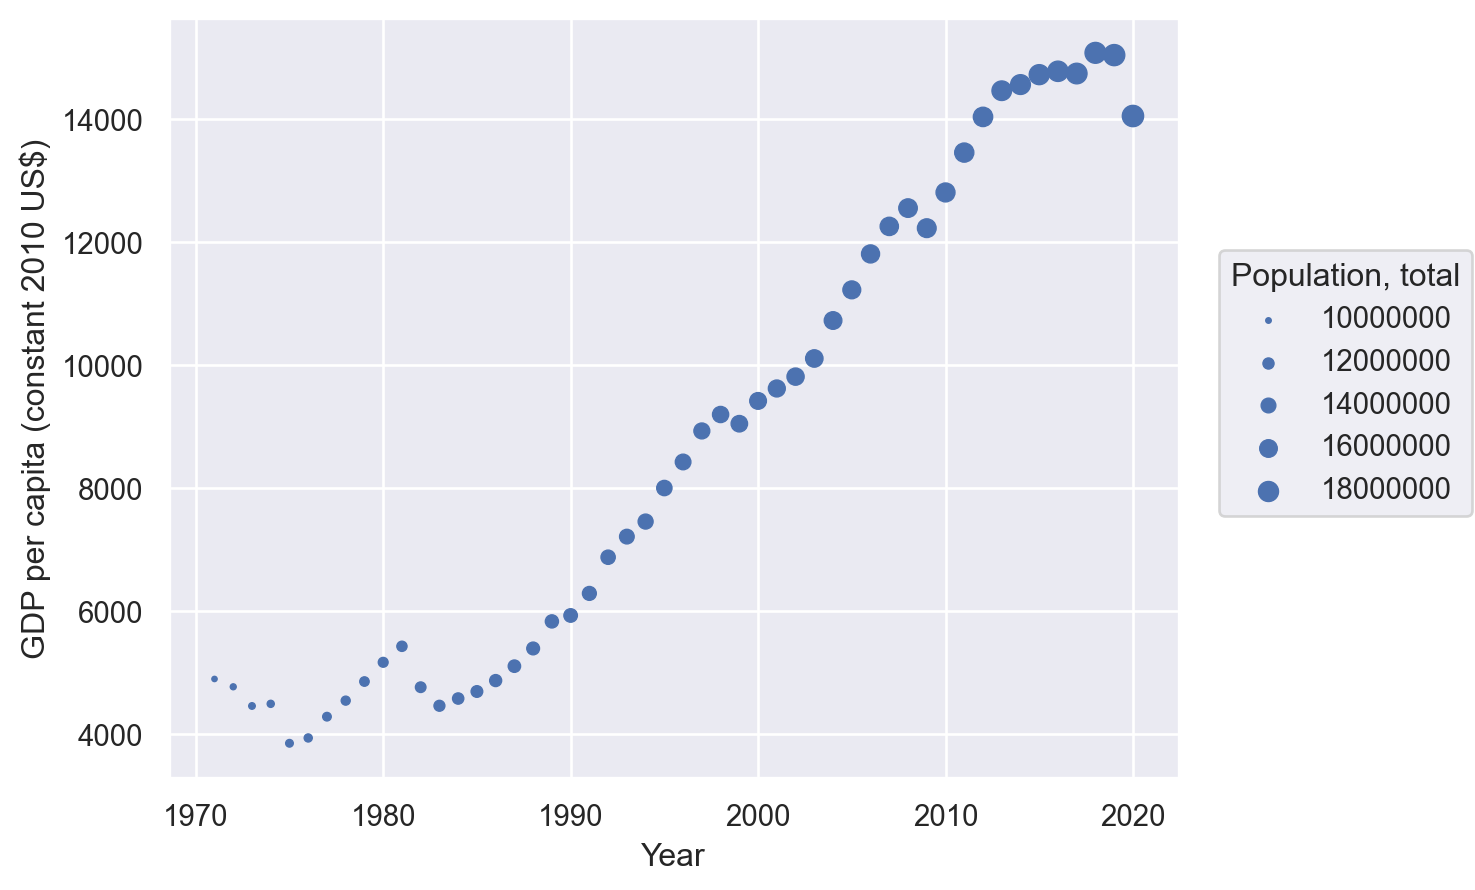

In [17]:
(
    so.Plot(
        chile,
        x="Year",
        y="GDP per capita (constant 2010 US$)",
        pointsize="Population, total",
    ).add(so.Dot())
)

### Exercise 7

Now add a second series. Facet your plot so that the two subplots are positioned so that they are effectively sharing the same time axes (e.g., if you draw a line up from 2010 on one plot, you get to 2010 on the other).

Rather than telling you exactly how to do it, however, I'll point you to the [seaborn tutorial](https://seaborn.pydata.org/tutorial/objects_interface#faceting-and-pairing-subplots). It has examples that don't do exactly what you want, but should be close enough you can guess-and-check to the solution you want!

Use your detective skills (and some guess and check work) to figure out how to get it to work!
